In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
COST = yf.download(tickers=["MGLU3.SA"], start="2015-01-01")["Adj Close"]
WMT = yf.download(tickers=["WEGE3.SA"], start="2015-01-01")["Adj Close"]
TGT = yf.download(tickers=["GGBR4.SA"], start="2015-01-01")["Adj Close"]
DG = yf.download(tickers=["DG"], start="2015-01-01")["Adj Close"]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

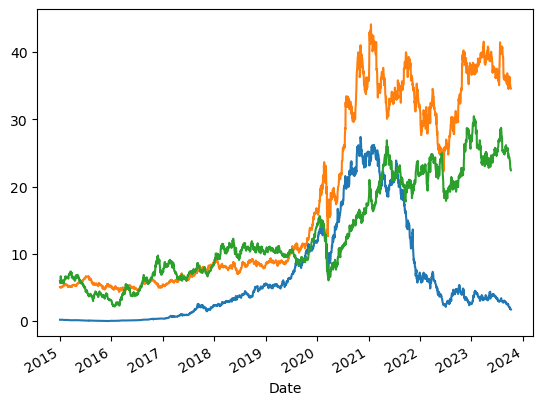

In [3]:
COST.plot()
WMT.plot()
TGT.plot()

In [4]:
retail= yf.download(tickers=["MGLU3.SA", "COST", "WEGE3.SA", "DG"], start="2015-01-01")["Adj Close"]
retail

[*********************100%%**********************]  4 of 4 completed


,COST,DG,MGLU3.SA,WEGE3.SA
Date,,,,
2015-01-02,118.242561,64.390579,0.215259,5.088045
2015-01-05,116.898201,63.972130,0.219304,5.122735
2015-01-06,118.442924,63.162464,0.216414,5.046747
2015-01-07,120.505363,63.926598,0.223638,4.988927
2015-01-08,121.540764,63.235241,0.221905,5.073178
...,...,...,...,...
2023-10-03,565.039978,105.004379,1.840000,35.169998
2023-10-04,571.799988,106.436394,1.890000,35.160000
2023-10-05,569.520020,105.790001,1.810000,34.980000


<Axes: xlabel='Date'>

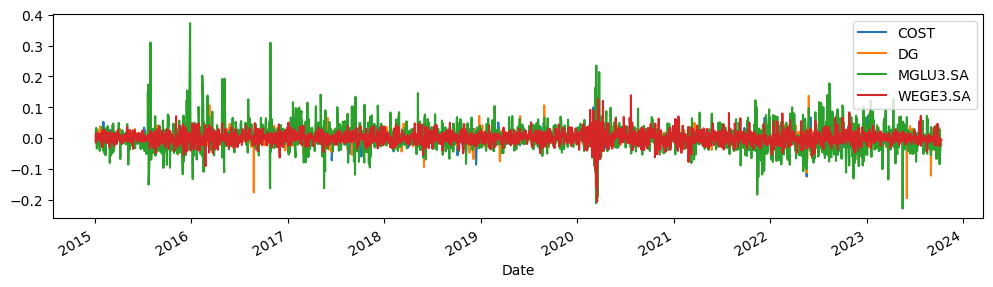

In [5]:
#daily returns
retail_retuns = retail.pct_change(1).dropna()
retail_retuns.plot(figsize=(12,3))

<Axes: ylabel='Frequency'>

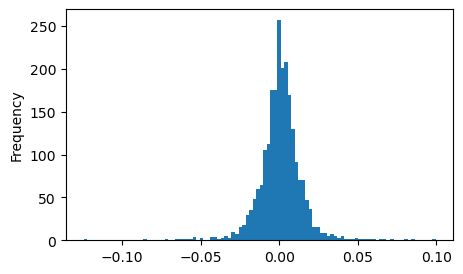

In [6]:
retail_retuns["COST"].plot(kind="hist", bins=100,figsize=(5,3))

<Axes: xlabel='Date'>

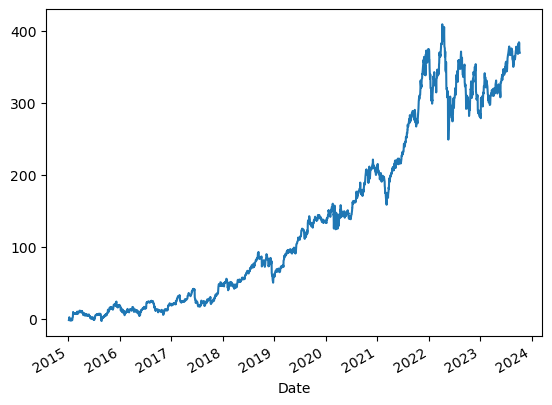

In [7]:
# cumulative retunr in 1 dolar
dolar =1
#(dolar + retail_retuns["COST"]).cumprod()

# cumulative retunr in 1 dolar percentage
cumulative_return = (dolar + retail_retuns["COST"]).cumprod() -1
cumulative_return_pct = 100* cumulative_return


# ver quantos % rendeu em um preiodo de tempo
cumulative_return_pct.plot()

In [8]:
# np.dot colocar pesos(%) de alocações em cada ativo
weights = [0.25,0.25,0.25,0.25]
equal_retunrs = np.dot(weights, retail_retuns.transpose())

cumulative_equal_weighted_returns = (1+equal_retunrs).cumprod() -1
cumulative_equal_weighted_returns = 100*cumulative_equal_weighted_returns

In [9]:
cumulative_equal_weighted_returns

array([ 1.93551391e-01, -4.94055074e-01,  7.85443431e-01, ...,
        6.35964070e+02,  6.24407060e+02,  6.16072540e+02])

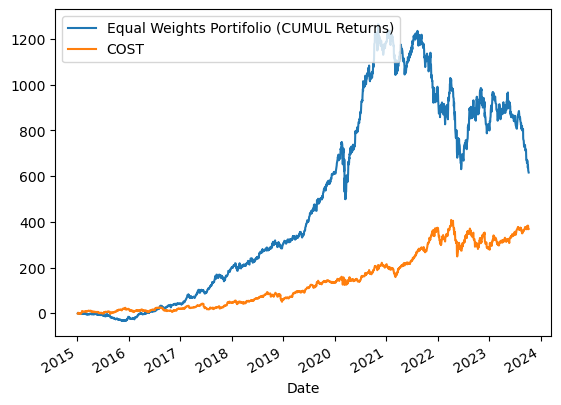

In [10]:
cewrp = pd.Series(cumulative_equal_weighted_returns, index=retail_retuns.index)
cewrp.plot(label="Equal Weights Portifolio (CUMUL Returns)")
cumulative_return_pct.plot()
plt.legend()

In [11]:
def gen_weights(N):
    weights = np.random.random(N)
    return weights/np.sum(weights)

In [12]:
weights =gen_weights(len(retail.columns))
weights

array([0.06233619, 0.36579021, 0.24497477, 0.32689882])

In [13]:
def calculate_returns(weights, log_rets):
    return np.sum(log_rets.mean() * weights) * 252

In [14]:
def calculate_volatility(weights, log_rets_cov):
    annualized_cov = np.dot(log_rets_cov*252,weights)
    vol = np.dot(weights.transpose(),annualized_cov)
    return np.sqrt(vol)

In [15]:
log_rets = np.log(retail / retail.shift(1))
log_rets_cov = log_rets.cov()

In [16]:
mc_portifolio_returns = []
mc_portifolio_vol = []
mc_weights = []

for sim in range(3000):
    weights = gen_weights(N=4)
    mc_weights.append(weights)
    sim_returns = calculate_returns(weights,log_rets)
    mc_portifolio_returns.append(sim_returns)
    sim_vol = calculate_volatility(weights, log_rets_cov)
    mc_portifolio_vol.append(sim_vol)

In [17]:
risk_free = 0
print(risk_free)
mc_sharpe_ratios = np.array(mc_portifolio_returns)-risk_free/np.array(mc_portifolio_vol)

0


In [18]:
mc_sharpe_ratios

array([0.16263934, 0.17484514, 0.17127292, ..., 0.12258092, 0.16571444,
       0.15812937])

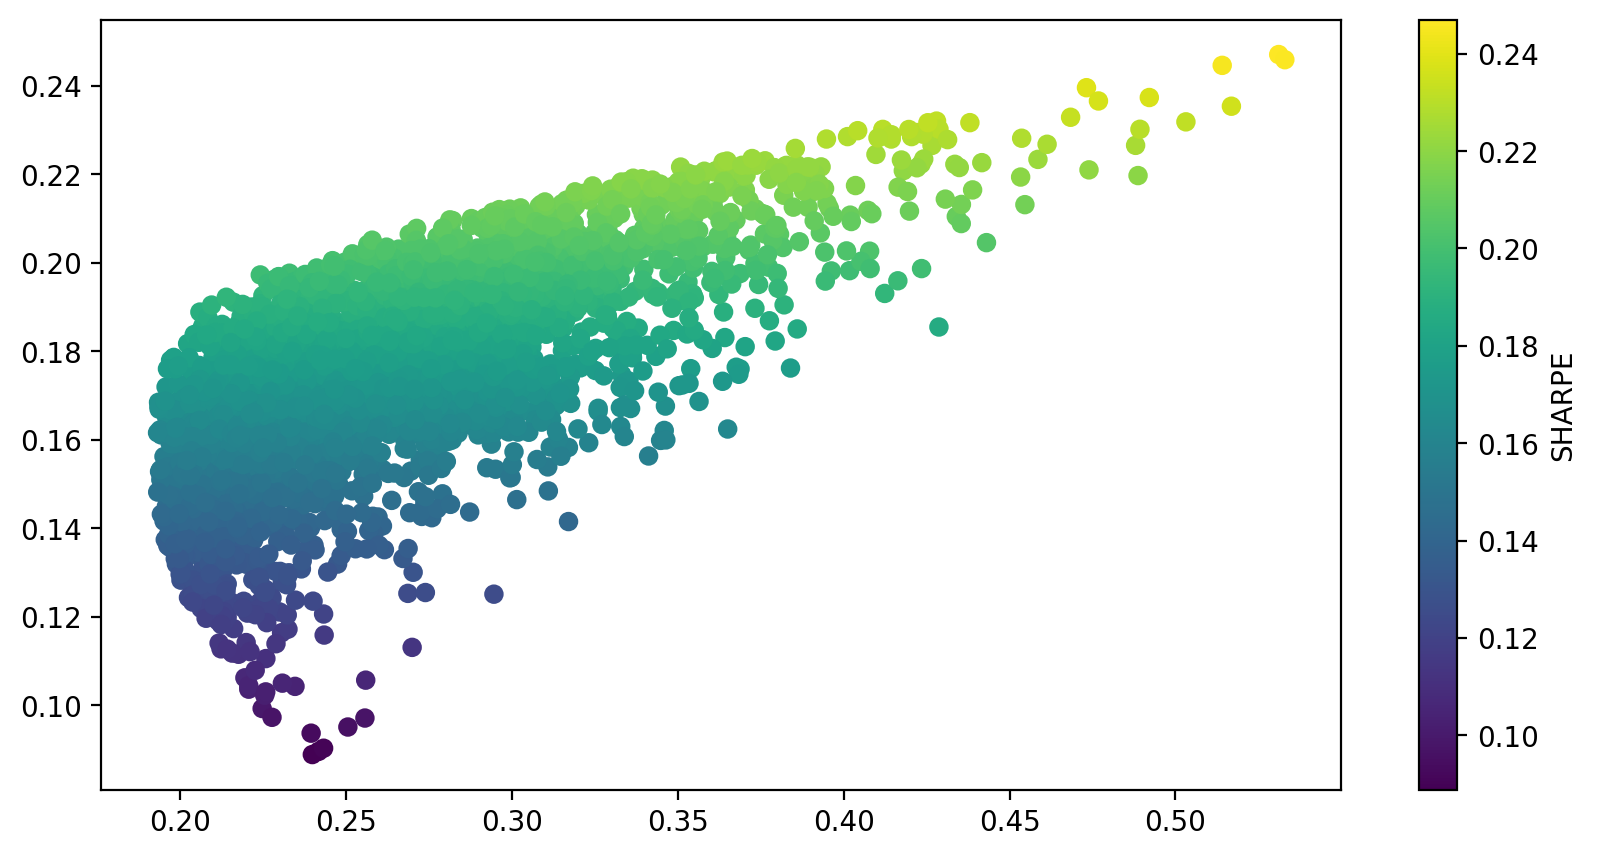

In [19]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_portifolio_vol,mc_portifolio_returns,c=mc_sharpe_ratios)
plt.xlabel=("Risco")
plt.colorbar(label="SHARPE" )


In [20]:
np.argmax(mc_sharpe_ratios)
mc_weights[1592]*100

array([16.68881276, 22.98282956, 31.57972627, 28.7486314 ])

In [21]:
mc_weights[1592]

array([0.16688813, 0.2298283 , 0.31579726, 0.28748631])

In [22]:
#####minimization
from scipy.optimize import minimize

In [23]:
def function_to_minimize(weights):
    risk_free = 0
    #MINIMIZa -1 * SR
    return -1 * (calculate_returns(weights,log_rets)-risk_free/calculate_volatility(weights,log_rets_cov))

In [24]:
bounds = tuple((0,1) for n in range(N))
bounds

NameError: name 'N' is not defined

In [ ]:
sum_constraint = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1})
minimize(fun=function_to_minimize,x0=equal_weights,bounds=bounds,constraints=sum_constraint)
np.sum(np.array([0.000e+00  0.000e+00  1.000e+00  0.000e+00

In [ ]:
N = len(retail.columns)
equal_weights = N * [1/N] # Shows 1/4, 4 times. Its not multiplication, but repetition! 4*["A"]
equal_weights

In [ ]:
minimize(fun=function_to_minimaze,
        x0=equal_weights,
        bounds=bounds,
        constraints = sum_constraint)

In [ ]:
retail.plot()